In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

In [2]:
resource_data = 'NOK.csv'
input_csv = "./input/{0}".format(resource_data)
qcom = pd.read_csv(input_csv)

In [3]:
qclose = qcom['Close']

In [4]:
def next_state(state, action):
    next_state = state.copy()
    if action == 'BUY':
        if state['HandCash'] > 0:
            next_state['NumStock'] += state['HandCash']/state['StockPrice']
        next_state['HandCash'] = 0
    elif action == 'SELL':
        next_state['NumStock'] = 0
        next_state['HandCash'] += state['StockPrice']*state['NumStock']
    return next_state


def reward(state, init_invest):
    return state['NumStock']*state['StockPrice'] + state['HandCash'] - init_invest


def my_reward(curr, last):
    return (curr['NumStock']*curr['StockPrice'] + curr['HandCash']) - (last['NumStock']*last['StockPrice'] + last['HandCash'])

In [5]:
from random import randint

# initial state
state = {'NumStock': 0, 'StockPrice': qclose[0], 'HandCash': 10000}
last_state = {'NumStock': 0, 'StockPrice': qclose[0], 'HandCash': 10000}
last_state_bf_act = {'NumStock': 0, 'StockPrice': qclose[0], 'HandCash': 10000}
act_list = ['BUY', 'SELL', 'HOLD']

last_reward = list()
avg_reward = list()
last_act = 'BUY'


for trial in range(0, 1000):
    state = {'NumStock': 0, 'StockPrice': qclose[0], 'HandCash': 10000}
    
    rew_sum = 0
    for point in range(0, len(qclose)):
    #for point in range(0, ):

        state['StockPrice'] = qclose[point]
        
        rew_sum += reward(state, 10000)
        
        if point == len(qclose)-1:
            avg_reward.append(rew_sum/10000)
            last_reward.append(reward(state, 10000))
            break

        last_act = act_list[randint(0, 2)]

        state = next_state(state, last_act)

after an action ---> call it the (new) state  
here: last_state_bf_act -> |act| -> last_state -> |new price release| -> (new) state  
but the last_state can be dismiss because when calculating(my_reward), it can be alternated by last_state_bf_act and keep the rule of the first line(i.e. after an action ---> call it the (new) state)

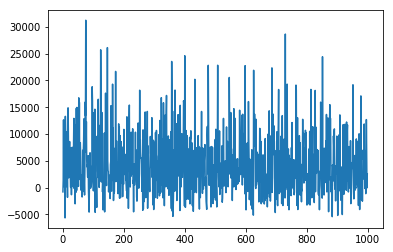

In [6]:
import matplotlib.pyplot as plt
plt.plot(last_reward)

In [7]:
sum(last_reward) / float(len(last_reward))

4264.4980774433825

#### 1000 trial
* QCOM
    * 99
* GOOG
    * 7064
* NOK
    * 4264

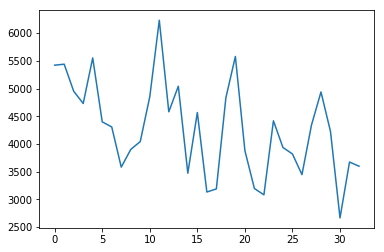

In [9]:
rough_last_rwd = list()
tmp_sum = 0
num_group = 30

for i in range(1, len(last_reward)):
    tmp_sum += last_reward[i]
    
    if(i%num_group == 0):
        rough_last_rwd.append(tmp_sum / num_group)
        tmp_sum = 0

plt.plot(rough_last_rwd)